In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn import tree
import matplotlib.pyplot as plt
from datetime import  date
import seaborn as sns

In [3]:
data = pd.read_csv("C:\pg\project\drop_dataset.csv")

In [36]:
data.head()

,Unnamed: 0,cust_id,transaction_date,subscription_price,subscription_type_BASIC,subscription_type_MAX,subscription_type_PRO,customer_country_Denmark,customer_country_Finland,customer_country_Norway,...,referral_type_Organic Search,referral_type_Paid Search,referral_type_TV,referral_type_Unknown,referral_type_facebook,age_group_18-24,age_group_25-34,age_group_35-44,age_group_45-54,age_group_55-65
0,0,1,2020-09-01,33,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,1,2,2022-03-01,53,True,False,False,True,False,False,...,False,False,False,False,True,True,False,False,False,False
2,2,3,2020-10-01,99,False,True,False,False,False,True,...,False,False,False,False,True,False,True,False,False,False
3,3,3,2022-02-01,53,True,False,False,False,False,True,...,False,False,False,False,True,False,True,False,False,False
4,4,4,2022-05-01,85,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [37]:
data.columns

Index(['Unnamed: 0', 'cust_id', 'transaction_date', 'subscription_price',
       'subscription_type_BASIC', 'subscription_type_MAX',
       'subscription_type_PRO', 'customer_country_Denmark',
       'customer_country_Finland', 'customer_country_Norway',
       'customer_country_Sweden', 'transaction_type_CHURN',
       'transaction_type_REDUCTION', 'transaction_type_UPGRADE',
       'transaction_type_initial', 'customer_gender_Female',
       'customer_gender_Male', 'customer_gender_Other', 'referral_type_Bing',
       'referral_type_Display', 'referral_type_Google Ads',
       'referral_type_Organic Search', 'referral_type_Paid Search',
       'referral_type_TV', 'referral_type_Unknown', 'referral_type_facebook',
       'age_group_18-24', 'age_group_25-34', 'age_group_35-44',
       'age_group_45-54', 'age_group_55-65'],
      dtype='object')

In [38]:
# initial과 churn 데이터만 추출
initial_data = data[data['transaction_type_initial'] == True]
churn_data = data[data['transaction_type_CHURN'] == True]

In [39]:
age_groups = ['age_group_18-24', 'age_group_25-34', 'age_group_35-44', 'age_group_45-54', 'age_group_55-65']

# 연령대별 비율 계산 함수
def calculate_ratio(df, age_groups):
    total = len(df)
    ratios = {}
    for age_group in age_groups:
        count = df[age_group].sum()
        ratios[age_group] = count / total if total != 0 else 0
    return ratios

# 'initial' 데이터 비율
initial_ratios = calculate_ratio(initial_data, age_groups)

# 'churn' 데이터 비율
churn_ratios = calculate_ratio(churn_data, age_groups)

print("Initial Ratios:", initial_ratios)
print("Churn Ratios:", churn_ratios)


Initial Ratios: {'age_group_18-24': 0.24464595793941732, 'age_group_25-34': 0.20422535211267606, 'age_group_35-44': 0.18097626857032606, 'age_group_45-54': 0.1876326451861856, 'age_group_55-65': 0.18251977619139495}
Churn Ratios: {'age_group_18-24': 0.25048732943469787, 'age_group_25-34': 0.21052631578947367, 'age_group_35-44': 0.1861598440545809, 'age_group_45-54': 0.16910331384015595, 'age_group_55-65': 0.18372319688109162}


In [41]:
# 나이대별 비율 데이터프레임 생성
ratio_df = pd.DataFrame({
    'initial': initial_ratios,
    'CHURN': churn_ratios
}).fillna(0)

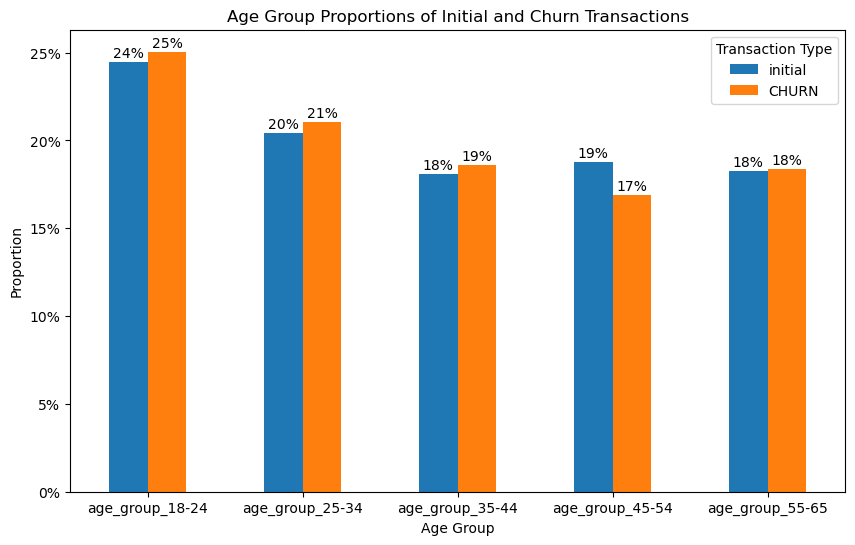

In [42]:
ax = ratio_df.plot(kind='bar', figsize=(10, 6))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.title('Age Group Proportions of Initial and Churn Transactions')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Transaction Type')


# 각 막대 위에 퍼센트 값 추가
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0%}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 6), 
                textcoords='offset points')
plt.show()